# Applying Autoencoders to early integrate DNA Methylation and Gene Expression data from TCGA 

In [1]:
import joblib
import pandas as pd
meth_df_path =  "pancancer_meth_chr_nonna_fillnamean.pkl"
pancancer_meth_list = joblib.load(meth_df_path)
len(pancancer_meth_list)

23

In [2]:
for chro in pancancer_meth_list:
    print(chro.shape)

(9756, 38021)
(9756, 19783)
(9756, 23600)
(9756, 19810)
(9756, 9745)
(9756, 12340)
(9756, 12446)
(9756, 17962)
(9756, 23404)
(9756, 5008)
(9756, 21049)
(9756, 28024)
(9756, 8649)
(9756, 3225)
(9756, 6994)
(9756, 20139)
(9756, 15927)
(9756, 19640)
(9756, 29181)
(9756, 24026)
(9756, 16464)
(9756, 8031)
(9756, 9706)


In [3]:
mv_pancancer_meth_list = []
for df in pancancer_meth_list:
    no_features = int(df.shape[1]/2)
    most_variable_genes = df.mad(axis = 0).nlargest(no_features, keep='all').index.values.tolist()
    #Subseting the genes from mvg_v3_df that are on the most_variable_genes list
    mvf_df = df[most_variable_genes]
    mv_pancancer_meth_list.append(mvf_df)
len(mv_pancancer_meth_list)


KeyboardInterrupt



In [ ]:
for chro in mv_pancancer_meth_list:
    print(chro.shape)

In [4]:
# ## Saving the list of chromosome dataframe
# joblib.dump(mv_pancancer_meth_list, "pancancer_meth_top50percent_chr_nonna_fillnamean.pkl")
pancancer_meth_list = joblib.load("pancancer_meth_top50percent_chr_nonna_fillnamean.pkl")

In [5]:
ge_5000_mvf_path = 'ge_5000_mvf.pkl'
ge_5000_mvf = joblib.load(ge_5000_mvf_path)

In [6]:
new_indices = []
for index in ge_5000_mvf.index:
    new_index = "-".join(index.split("-")[:4])
    new_indices.append(new_index)
ge_5000_mvf.index = new_indices

for df in pancancer_meth_list: 
    new_indices = []
    for index in df.index:
#         print(index)
        new_index = index[1]
        new_indices.append(new_index)
    df.index =  new_indices

### Subsetting dataframes based on intersection and removing duplicate indices (tumor and normal)

In [35]:
subset_ge_df = ge_5000_mvf[ge_5000_mvf.index.isin(pancancer_meth_list[0].index)]
subset_ge_df = subset_ge_df[~subset_ge_df.index.duplicated(keep='first')] 
subset_ge_df = subset_ge_df.sort_index() #Ensuring the order of the subset is same as that in Meth

subset_meth_df_list = []
for df in pancancer_meth_list: 
    new_df = df[df.index.isin(ge_5000_mvf.index)]
    new_df = new_df[~new_df.index.duplicated(keep='first')]
    new_df = new_df.sort_index() #Ensuring the order of the subset is same as that in GE
    subset_meth_df_list.append(new_df)
    
print(subset_ge_df.shape,subset_meth_df_list[0].shape)

(9081, 5000) (9081, 19012)


In [36]:
subset_ge_df.head()

,ENSG00000264190.1,ENSG00000266631.1,ENSG00000200815.1,ENSG00000263933.1,ENSG00000273662.1,ENSG00000277792.1,ENSG00000281114.1,ENSG00000275076.1,ENSG00000211575.2,ENSG00000207614.1,...,ENSG00000259414.1,ENSG00000259404.4,ENSG00000227154.3,ENSG00000239856.3,ENSG00000255850.1,ENSG00000259195.1,ENSG00000211725.3,ENSG00000207708.1,ENSG00000258509.1,ENSG00000229992.1
TCGA-05-4384-01A,0.000000,0.737947,0.807018,0.743232,0.734641,0.000000,0.813832,0.724204,0.784498,0.0,...,0.000000,0.633819,0.000000,0.0,0.536889,0.000000,0.591169,0.726956,0.0,0.000000
TCGA-05-4390-01A,0.000000,0.746553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.793887,0.0,...,0.000000,0.000000,0.565164,0.0,0.544821,0.000000,0.548618,0.735530,0.0,0.555917
TCGA-05-4396-01A,0.769659,0.758458,0.000000,0.763890,0.754195,0.763584,0.774668,0.000000,0.806875,0.0,...,0.866652,0.656335,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
TCGA-05-4405-01A,0.000000,0.000000,0.000000,0.750687,0.741697,0.000000,0.857288,0.786256,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.543711,0.561356,0.000000,0.000000,0.0,0.000000
TCGA-05-4410-01A,0.000000,0.000000,0.830133,0.000000,0.755866,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.557408,0.000000,0.560504,0.000000,0.0,0.000000


In [37]:
subset_meth_df_list[0].head()

,cg03596016,cg12911732,cg10501210,cg15497761,cg02837536,cg05940691,cg25407979,cg10210594,rs2804694,cg13495205,...,cg05392440,cg06819200,cg06977831,cg09322616,cg10026356,cg15686216,cg17297328,cg18321138,cg21453303,cg23677911
TCGA-05-4384-01A,0.074890,0.684082,0.209229,0.171631,0.225220,0.709473,0.692383,0.307617,0.921875,0.288818,...,0.026245,0.070007,0.897461,0.856445,0.853027,0.874023,0.164185,0.861328,0.138428,0.891602
TCGA-05-4390-01A,0.801758,0.797363,0.877441,0.086426,0.520508,0.234985,0.343262,0.675781,0.938477,0.683105,...,0.030014,0.566895,0.902344,0.836426,0.853516,0.849121,0.099060,0.585449,0.141235,0.885742
TCGA-05-4396-01A,0.848633,0.514160,0.125000,0.857422,0.099670,0.714355,0.418457,0.708496,0.230957,0.535645,...,0.037994,0.086670,0.922852,0.892090,0.930664,0.811523,0.158569,0.832520,0.175293,0.892578
TCGA-05-4405-01A,0.758789,0.803223,0.341797,0.763672,0.617188,0.921875,0.699219,0.699707,0.419922,0.629883,...,0.032440,0.078613,0.782715,0.763672,0.885254,0.894043,0.130493,0.912109,0.340820,0.861328
TCGA-05-4410-01A,0.610840,0.663574,0.402588,0.262695,0.655762,0.792969,0.295654,0.442139,0.501953,0.629395,...,0.029160,0.054047,0.563965,0.827148,0.824707,0.888184,0.121765,0.883301,0.193970,0.873047


### 5. Building a Vanilla Autoencoder

In [38]:
import tensorflow as tf
# print(tf.__version__)
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [39]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
from numpy.random import seed
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Concatenate
from keras.models import Model
from keras import backend as K #For explicitly \adjusting the learning rate
from tensorflow import keras

In [40]:
from numpy.random import seed
seed(1)

tf.random.set_seed(2)


In [41]:
X_train, X_val = train_test_split(subset_meth_df_list[0], test_size=0.2, random_state = seed(77))
#Since the samples will be split similarly across all chromosomes, we shall match the indices for 
# X_train and X_val across all chr
training_indices = X_train.index
validation_indices = X_val.index

X_train_list = []
X_val_list = []
for chrom_df in subset_meth_df_list:
    X_train_list.append(chrom_df.loc[training_indices])
    X_val_list.append(chrom_df.loc[validation_indices])

X_train_ge = subset_ge_df.loc[training_indices]
X_val_ge = subset_ge_df.loc[validation_indices]

X_train = [X_train_list,X_train_ge]
X_val = [X_val_list,X_val_ge]

In [45]:
tf.keras.backend.clear_session()
ncol_list = []
for df in subset_meth_df_list:
    ncol_list.append(df.shape[1])
    
number_of_chromosomes = len(subset_meth_df_list)

chromsomome_dim = 100 # 100*23
hidden_layer_dim = 500 
encoding_dim = 100 #Nodes in Bottleneck layer

# Encoder Layers
encoded1_list = []
input_dim_list = []
for ncol in ncol_list:
    input_dim_i = Input(shape = (ncol, ))
    input_dim_list.append(input_dim_i)
    encoded1_i = Dense(chromsomome_dim, activation = 'relu')(input_dim_i)
#     input_model = Model(inputs=input_dim_i, outputs=encoded1_i)
    encoded1_list.append(encoded1_i)

# encoded1 = concatenate(encoded1_list)
encoded1_meth = Concatenate(axis=1)(encoded1_list)
encoded2_meth = Dense(hidden_layer_dim, activation = 'relu')(encoded1_meth)

input_ge = Input(shape = (subset_ge_df.shape[1], ))
encoded2_ge = Dense(hidden_layer_dim, activation = 'relu')(input_ge)

encoded2 = Concatenate(axis=1)([encoded2_meth,encoded2_ge])
encoded3 = Dense(encoding_dim, activation = 'relu')(encoded2)

# Decoder Layers
decoded3 = Dense(hidden_layer_dim*2, activation = 'relu')(encoded3)

decoded3_meth = decoded3[:,:hidden_layer_dim]
decoded2_me = Dense(chromsomome_dim*number_of_chromosomes, activation = 'relu')(decoded3_meth)
reconstructured_meth_list = []
for i in range(0,number_of_chromosomes):
    start = chromsomome_dim*(i)
    end = chromsomome_dim*(i+1)
    decoded2_me_i = decoded2_me[:,start:end] #Splicing the tensor back to chromsomome_dim*23 tensors
    decoded1_me_i = Dense(ncol_list[i], activation = 'sigmoid')(decoded2_me_i)
#     output_model = Model(inputs=decoded2_i, outputs=decoded1_i)
#     reconstructured_inputs.append(output_model.output)
    reconstructured_meth_list.append(decoded1_me_i)

decoded3_ge = decoded3[:,hidden_layer_dim:]
reconstructed_ge = Dense(subset_ge_df.shape[1], activation = 'sigmoid')(decoded3_ge)
    
autoencoder = Model(inputs = [input_dim_list,input_ge], outputs = [reconstructured_meth_list,reconstructed_ge])

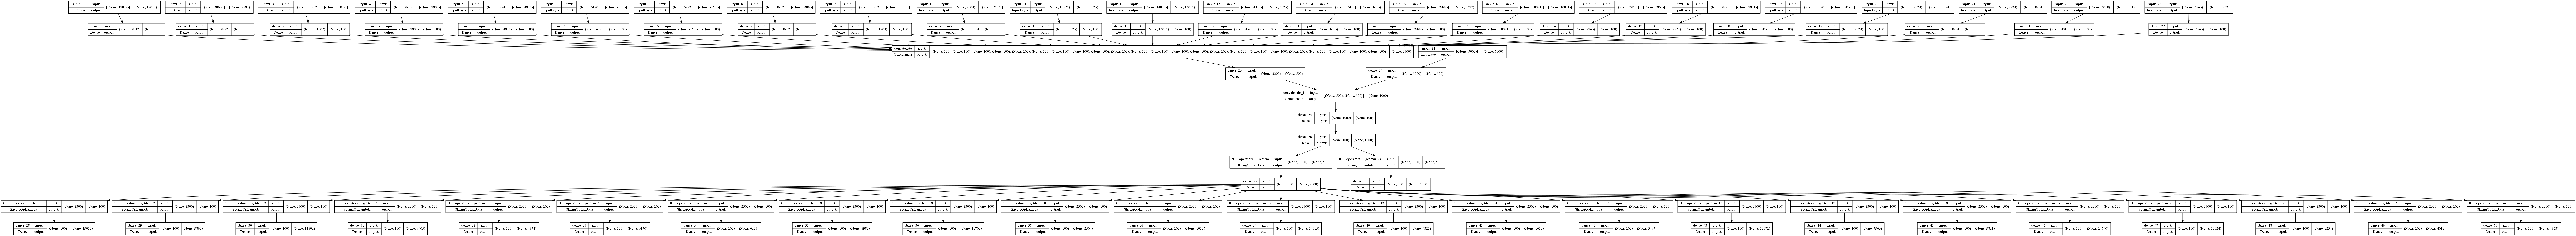

In [46]:
#Plotting the model
# !pip install pydot
from keras.utils.vis_utils import plot_model
plot_model(autoencoder, show_shapes=True, show_layer_names=True) #to_file='model_plot.png', )

In [47]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 19012)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9892)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 11802)]      0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 9905)]       0           []                               
                                                                                              

 dense_17 (Dense)               (None, 100)          982200      ['input_18[0][0]']               
                                                                                                  
 dense_18 (Dense)               (None, 100)          1459100     ['input_19[0][0]']               
                                                                                                  
 dense_19 (Dense)               (None, 100)          1202500     ['input_20[0][0]']               
                                                                                                  
 dense_20 (Dense)               (None, 100)          823500      ['input_21[0][0]']               
                                                                                                  
 dense_21 (Dense)               (None, 100)          401900      ['input_22[0][0]']               
                                                                                                  
 dense_22 

 licingOpLambda)                                                                                  
                                                                                                  
 tf.__operators__.getitem_11 (S  (None, 100)         0           ['dense_27[0][0]']               
 licingOpLambda)                                                                                  
                                                                                                  
 tf.__operators__.getitem_12 (S  (None, 100)         0           ['dense_27[0][0]']               
 licingOpLambda)                                                                                  
                                                                                                  
 tf.__operators__.getitem_13 (S  (None, 100)         0           ['dense_27[0][0]']               
 licingOpLambda)                                                                                  
          

 dense_41 (Dense)               (None, 1613)         162913      ['tf.__operators__.getitem_14[0][
                                                                 0]']                             
                                                                                                  
 dense_42 (Dense)               (None, 3497)         353197      ['tf.__operators__.getitem_15[0][
                                                                 0]']                             
                                                                                                  
 dense_43 (Dense)               (None, 10071)        1017171     ['tf.__operators__.getitem_16[0][
                                                                 0]']                             
                                                                                                  
 dense_44 (Dense)               (None, 7963)         804263      ['tf.__operators__.getitem_17[0][
          

In [48]:
#MODEL Parameters
def averaged_mean_squared_error(y_true, y_pred):
        return (K.sqrt(K.mean(K.square(y_pred - y_true))))/number_of_chromosomes

# Compile the Model
autoencoder.compile(optimizer = 'adam', loss = 'mse') 

#adam - stochastic gradient descent algorithm

# K.set_value(autoencoder.optimizer.learning_rate, 0.0001)


In [49]:
#Implementing Early Stopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
import datetime

learning_rate = ReduceLROnPlateau(monitor='val_loss',patience=20, verbose=1, factor=0.5, min_lr=1e-10)

# earlystopping_callback = EarlyStopping(monitor='val_loss', patience=4, min_delta=0.0001)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# import h5py
# !pip install --upgrade h5py=1.8.21
# #Saving best Model after the Stopping
# mc = ModelCheckpoint('meth_ae_v1.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [50]:
print(log_dir)

logs/fit/20220420-095437


In [51]:
history = autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 32, shuffle = False, verbose = 1, validation_data = (X_val, X_val), callbacks=[learning_rate,tensorboard_callback])

Epoch 1/100
227/227 [==============================] - 27s 101ms/step - loss: 0.8564 - dense_28_loss: 0.0329 - dense_29_loss: 0.0347 - dense_30_loss: 0.0326 - dense_31_loss: 0.0342 - dense_32_loss: 0.0356 - dense_33_loss: 0.0327 - dense_34_loss: 0.0326 - dense_35_loss: 0.0311 - dense_36_loss: 0.0318 - dense_37_loss: 0.0337 - dense_38_loss: 0.0295 - dense_39_loss: 0.0346 - dense_40_loss: 0.0325 - dense_41_loss: 0.0344 - dense_42_loss: 0.0294 - dense_43_loss: 0.0334 - dense_44_loss: 0.0342 - dense_45_loss: 0.0360 - dense_46_loss: 0.0332 - dense_47_loss: 0.0354 - dense_48_loss: 0.0358 - dense_49_loss: 0.0308 - dense_50_loss: 0.0334 - dense_51_loss: 0.0917 - val_loss: 0.6578 - val_dense_28_loss: 0.0247 - val_dense_29_loss: 0.0263 - val_dense_30_loss: 0.0250 - val_dense_31_loss: 0.0258 - val_dense_32_loss: 0.0267 - val_dense_33_loss: 0.0247 - val_dense_34_loss: 0.0247 - val_dense_35_loss: 0.0235 - val_dense_36_loss: 0.0244 - val_dense_37_loss: 0.0250 - val_dense_38_loss: 0.0219 - val_dense_

227/227 [==============================] - 16s 68ms/step - loss: 0.4402 - dense_28_loss: 0.0155 - dense_29_loss: 0.0166 - dense_30_loss: 0.0156 - dense_31_loss: 0.0162 - dense_32_loss: 0.0171 - dense_33_loss: 0.0157 - dense_34_loss: 0.0156 - dense_35_loss: 0.0147 - dense_36_loss: 0.0149 - dense_37_loss: 0.0168 - dense_38_loss: 0.0146 - dense_39_loss: 0.0163 - dense_40_loss: 0.0155 - dense_41_loss: 0.0168 - dense_42_loss: 0.0138 - dense_43_loss: 0.0160 - dense_44_loss: 0.0166 - dense_45_loss: 0.0177 - dense_46_loss: 0.0163 - dense_47_loss: 0.0168 - dense_48_loss: 0.0172 - dense_49_loss: 0.0149 - dense_50_loss: 0.0156 - dense_51_loss: 0.0735 - val_loss: 0.4444 - val_dense_28_loss: 0.0156 - val_dense_29_loss: 0.0167 - val_dense_30_loss: 0.0157 - val_dense_31_loss: 0.0163 - val_dense_32_loss: 0.0172 - val_dense_33_loss: 0.0159 - val_dense_34_loss: 0.0157 - val_dense_35_loss: 0.0148 - val_dense_36_loss: 0.0150 - val_dense_37_loss: 0.0169 - val_dense_38_loss: 0.0148 - val_dense_39_loss: 0.01

227/227 [==============================] - 16s 69ms/step - loss: 0.4142 - dense_28_loss: 0.0145 - dense_29_loss: 0.0155 - dense_30_loss: 0.0146 - dense_31_loss: 0.0151 - dense_32_loss: 0.0160 - dense_33_loss: 0.0146 - dense_34_loss: 0.0146 - dense_35_loss: 0.0137 - dense_36_loss: 0.0139 - dense_37_loss: 0.0156 - dense_38_loss: 0.0137 - dense_39_loss: 0.0153 - dense_40_loss: 0.0144 - dense_41_loss: 0.0155 - dense_42_loss: 0.0128 - dense_43_loss: 0.0149 - dense_44_loss: 0.0155 - dense_45_loss: 0.0166 - dense_46_loss: 0.0152 - dense_47_loss: 0.0158 - dense_48_loss: 0.0161 - dense_49_loss: 0.0138 - dense_50_loss: 0.0149 - dense_51_loss: 0.0717 - val_loss: 0.4360 - val_dense_28_loss: 0.0152 - val_dense_29_loss: 0.0164 - val_dense_30_loss: 0.0153 - val_dense_31_loss: 0.0159 - val_dense_32_loss: 0.0169 - val_dense_33_loss: 0.0156 - val_dense_34_loss: 0.0153 - val_dense_35_loss: 0.0144 - val_dense_36_loss: 0.0146 - val_dense_37_loss: 0.0165 - val_dense_38_loss: 0.0144 - val_dense_39_loss: 0.01

227/227 [==============================] - 16s 70ms/step - loss: 0.4029 - dense_28_loss: 0.0140 - dense_29_loss: 0.0151 - dense_30_loss: 0.0141 - dense_31_loss: 0.0146 - dense_32_loss: 0.0155 - dense_33_loss: 0.0142 - dense_34_loss: 0.0141 - dense_35_loss: 0.0133 - dense_36_loss: 0.0135 - dense_37_loss: 0.0151 - dense_38_loss: 0.0133 - dense_39_loss: 0.0148 - dense_40_loss: 0.0139 - dense_41_loss: 0.0150 - dense_42_loss: 0.0124 - dense_43_loss: 0.0144 - dense_44_loss: 0.0150 - dense_45_loss: 0.0161 - dense_46_loss: 0.0148 - dense_47_loss: 0.0153 - dense_48_loss: 0.0156 - dense_49_loss: 0.0134 - dense_50_loss: 0.0145 - dense_51_loss: 0.0710 - val_loss: 0.4429 - val_dense_28_loss: 0.0156 - val_dense_29_loss: 0.0167 - val_dense_30_loss: 0.0157 - val_dense_31_loss: 0.0162 - val_dense_32_loss: 0.0173 - val_dense_33_loss: 0.0157 - val_dense_34_loss: 0.0157 - val_dense_35_loss: 0.0146 - val_dense_36_loss: 0.0149 - val_dense_37_loss: 0.0166 - val_dense_38_loss: 0.0144 - val_dense_39_loss: 0.01

227/227 [==============================] - 16s 69ms/step - loss: 0.4007 - dense_28_loss: 0.0139 - dense_29_loss: 0.0150 - dense_30_loss: 0.0140 - dense_31_loss: 0.0146 - dense_32_loss: 0.0154 - dense_33_loss: 0.0141 - dense_34_loss: 0.0141 - dense_35_loss: 0.0132 - dense_36_loss: 0.0134 - dense_37_loss: 0.0150 - dense_38_loss: 0.0132 - dense_39_loss: 0.0147 - dense_40_loss: 0.0139 - dense_41_loss: 0.0149 - dense_42_loss: 0.0123 - dense_43_loss: 0.0143 - dense_44_loss: 0.0149 - dense_45_loss: 0.0160 - dense_46_loss: 0.0147 - dense_47_loss: 0.0152 - dense_48_loss: 0.0155 - dense_49_loss: 0.0133 - dense_50_loss: 0.0144 - dense_51_loss: 0.0706 - val_loss: 0.4258 - val_dense_28_loss: 0.0148 - val_dense_29_loss: 0.0159 - val_dense_30_loss: 0.0150 - val_dense_31_loss: 0.0155 - val_dense_32_loss: 0.0164 - val_dense_33_loss: 0.0151 - val_dense_34_loss: 0.0151 - val_dense_35_loss: 0.0140 - val_dense_36_loss: 0.0142 - val_dense_37_loss: 0.0160 - val_dense_38_loss: 0.0141 - val_dense_39_loss: 0.01

227/227 [==============================] - 15s 68ms/step - loss: 0.3902 - dense_28_loss: 0.0135 - dense_29_loss: 0.0145 - dense_30_loss: 0.0136 - dense_31_loss: 0.0141 - dense_32_loss: 0.0149 - dense_33_loss: 0.0137 - dense_34_loss: 0.0136 - dense_35_loss: 0.0128 - dense_36_loss: 0.0130 - dense_37_loss: 0.0146 - dense_38_loss: 0.0129 - dense_39_loss: 0.0143 - dense_40_loss: 0.0135 - dense_41_loss: 0.0145 - dense_42_loss: 0.0119 - dense_43_loss: 0.0138 - dense_44_loss: 0.0145 - dense_45_loss: 0.0156 - dense_46_loss: 0.0143 - dense_47_loss: 0.0147 - dense_48_loss: 0.0150 - dense_49_loss: 0.0130 - dense_50_loss: 0.0140 - dense_51_loss: 0.0699 - val_loss: 0.4206 - val_dense_28_loss: 0.0146 - val_dense_29_loss: 0.0156 - val_dense_30_loss: 0.0147 - val_dense_31_loss: 0.0152 - val_dense_32_loss: 0.0160 - val_dense_33_loss: 0.0148 - val_dense_34_loss: 0.0148 - val_dense_35_loss: 0.0138 - val_dense_36_loss: 0.0141 - val_dense_37_loss: 0.0157 - val_dense_38_loss: 0.0140 - val_dense_39_loss: 0.01

227/227 [==============================] - 16s 70ms/step - loss: 0.3903 - dense_28_loss: 0.0135 - dense_29_loss: 0.0146 - dense_30_loss: 0.0136 - dense_31_loss: 0.0141 - dense_32_loss: 0.0149 - dense_33_loss: 0.0137 - dense_34_loss: 0.0136 - dense_35_loss: 0.0128 - dense_36_loss: 0.0130 - dense_37_loss: 0.0146 - dense_38_loss: 0.0129 - dense_39_loss: 0.0143 - dense_40_loss: 0.0135 - dense_41_loss: 0.0145 - dense_42_loss: 0.0119 - dense_43_loss: 0.0138 - dense_44_loss: 0.0145 - dense_45_loss: 0.0156 - dense_46_loss: 0.0143 - dense_47_loss: 0.0147 - dense_48_loss: 0.0150 - dense_49_loss: 0.0129 - dense_50_loss: 0.0141 - dense_51_loss: 0.0698 - val_loss: 0.4281 - val_dense_28_loss: 0.0149 - val_dense_29_loss: 0.0161 - val_dense_30_loss: 0.0149 - val_dense_31_loss: 0.0156 - val_dense_32_loss: 0.0166 - val_dense_33_loss: 0.0152 - val_dense_34_loss: 0.0150 - val_dense_35_loss: 0.0142 - val_dense_36_loss: 0.0142 - val_dense_37_loss: 0.0161 - val_dense_38_loss: 0.0143 - val_dense_39_loss: 0.01

227/227 [==============================] - 16s 69ms/step - loss: 0.3865 - dense_28_loss: 0.0133 - dense_29_loss: 0.0144 - dense_30_loss: 0.0135 - dense_31_loss: 0.0140 - dense_32_loss: 0.0148 - dense_33_loss: 0.0135 - dense_34_loss: 0.0135 - dense_35_loss: 0.0126 - dense_36_loss: 0.0129 - dense_37_loss: 0.0145 - dense_38_loss: 0.0127 - dense_39_loss: 0.0141 - dense_40_loss: 0.0133 - dense_41_loss: 0.0144 - dense_42_loss: 0.0118 - dense_43_loss: 0.0137 - dense_44_loss: 0.0143 - dense_45_loss: 0.0154 - dense_46_loss: 0.0141 - dense_47_loss: 0.0146 - dense_48_loss: 0.0149 - dense_49_loss: 0.0128 - dense_50_loss: 0.0139 - dense_51_loss: 0.0696 - val_loss: 0.4180 - val_dense_28_loss: 0.0144 - val_dense_29_loss: 0.0156 - val_dense_30_loss: 0.0146 - val_dense_31_loss: 0.0151 - val_dense_32_loss: 0.0160 - val_dense_33_loss: 0.0148 - val_dense_34_loss: 0.0146 - val_dense_35_loss: 0.0138 - val_dense_36_loss: 0.0140 - val_dense_37_loss: 0.0157 - val_dense_38_loss: 0.0139 - val_dense_39_loss: 0.01

Epoch 49/100
227/227 [==============================] - 15s 68ms/step - loss: 0.3799 - dense_28_loss: 0.0130 - dense_29_loss: 0.0141 - dense_30_loss: 0.0132 - dense_31_loss: 0.0137 - dense_32_loss: 0.0145 - dense_33_loss: 0.0133 - dense_34_loss: 0.0132 - dense_35_loss: 0.0124 - dense_36_loss: 0.0126 - dense_37_loss: 0.0142 - dense_38_loss: 0.0125 - dense_39_loss: 0.0139 - dense_40_loss: 0.0131 - dense_41_loss: 0.0141 - dense_42_loss: 0.0115 - dense_43_loss: 0.0134 - dense_44_loss: 0.0141 - dense_45_loss: 0.0151 - dense_46_loss: 0.0138 - dense_47_loss: 0.0143 - dense_48_loss: 0.0146 - dense_49_loss: 0.0126 - dense_50_loss: 0.0137 - dense_51_loss: 0.0689 - val_loss: 0.4075 - val_dense_28_loss: 0.0140 - val_dense_29_loss: 0.0151 - val_dense_30_loss: 0.0141 - val_dense_31_loss: 0.0147 - val_dense_32_loss: 0.0156 - val_dense_33_loss: 0.0143 - val_dense_34_loss: 0.0142 - val_dense_35_loss: 0.0133 - val_dense_36_loss: 0.0135 - val_dense_37_loss: 0.0152 - val_dense_38_loss: 0.0135 - val_dense_

Epoch 55/100
227/227 [==============================] - 16s 70ms/step - loss: 0.3685 - dense_28_loss: 0.0126 - dense_29_loss: 0.0137 - dense_30_loss: 0.0128 - dense_31_loss: 0.0132 - dense_32_loss: 0.0140 - dense_33_loss: 0.0128 - dense_34_loss: 0.0128 - dense_35_loss: 0.0120 - dense_36_loss: 0.0121 - dense_37_loss: 0.0138 - dense_38_loss: 0.0121 - dense_39_loss: 0.0134 - dense_40_loss: 0.0126 - dense_41_loss: 0.0136 - dense_42_loss: 0.0111 - dense_43_loss: 0.0129 - dense_44_loss: 0.0136 - dense_45_loss: 0.0147 - dense_46_loss: 0.0134 - dense_47_loss: 0.0138 - dense_48_loss: 0.0141 - dense_49_loss: 0.0121 - dense_50_loss: 0.0133 - dense_51_loss: 0.0678 - val_loss: 0.4034 - val_dense_28_loss: 0.0138 - val_dense_29_loss: 0.0150 - val_dense_30_loss: 0.0140 - val_dense_31_loss: 0.0145 - val_dense_32_loss: 0.0154 - val_dense_33_loss: 0.0141 - val_dense_34_loss: 0.0140 - val_dense_35_loss: 0.0131 - val_dense_36_loss: 0.0133 - val_dense_37_loss: 0.0150 - val_dense_38_loss: 0.0134 - val_dense_

Epoch 61/100
227/227 [==============================] - 16s 70ms/step - loss: 0.3652 - dense_28_loss: 0.0124 - dense_29_loss: 0.0135 - dense_30_loss: 0.0127 - dense_31_loss: 0.0131 - dense_32_loss: 0.0139 - dense_33_loss: 0.0127 - dense_34_loss: 0.0127 - dense_35_loss: 0.0119 - dense_36_loss: 0.0120 - dense_37_loss: 0.0137 - dense_38_loss: 0.0120 - dense_39_loss: 0.0133 - dense_40_loss: 0.0125 - dense_41_loss: 0.0135 - dense_42_loss: 0.0110 - dense_43_loss: 0.0128 - dense_44_loss: 0.0134 - dense_45_loss: 0.0145 - dense_46_loss: 0.0133 - dense_47_loss: 0.0137 - dense_48_loss: 0.0140 - dense_49_loss: 0.0120 - dense_50_loss: 0.0132 - dense_51_loss: 0.0675 - val_loss: 0.4029 - val_dense_28_loss: 0.0138 - val_dense_29_loss: 0.0149 - val_dense_30_loss: 0.0140 - val_dense_31_loss: 0.0144 - val_dense_32_loss: 0.0154 - val_dense_33_loss: 0.0141 - val_dense_34_loss: 0.0140 - val_dense_35_loss: 0.0131 - val_dense_36_loss: 0.0133 - val_dense_37_loss: 0.0150 - val_dense_38_loss: 0.0133 - val_dense_

Epoch 67/100
227/227 [==============================] - 16s 69ms/step - loss: 0.3678 - dense_28_loss: 0.0125 - dense_29_loss: 0.0136 - dense_30_loss: 0.0128 - dense_31_loss: 0.0132 - dense_32_loss: 0.0140 - dense_33_loss: 0.0128 - dense_34_loss: 0.0128 - dense_35_loss: 0.0120 - dense_36_loss: 0.0121 - dense_37_loss: 0.0138 - dense_38_loss: 0.0121 - dense_39_loss: 0.0134 - dense_40_loss: 0.0126 - dense_41_loss: 0.0136 - dense_42_loss: 0.0111 - dense_43_loss: 0.0129 - dense_44_loss: 0.0135 - dense_45_loss: 0.0146 - dense_46_loss: 0.0134 - dense_47_loss: 0.0138 - dense_48_loss: 0.0141 - dense_49_loss: 0.0121 - dense_50_loss: 0.0134 - dense_51_loss: 0.0677 - val_loss: 0.4055 - val_dense_28_loss: 0.0139 - val_dense_29_loss: 0.0150 - val_dense_30_loss: 0.0140 - val_dense_31_loss: 0.0145 - val_dense_32_loss: 0.0155 - val_dense_33_loss: 0.0142 - val_dense_34_loss: 0.0141 - val_dense_35_loss: 0.0132 - val_dense_36_loss: 0.0134 - val_dense_37_loss: 0.0152 - val_dense_38_loss: 0.0134 - val_dense_

Epoch 73/100
227/227 [==============================] - 16s 69ms/step - loss: 0.3701 - dense_28_loss: 0.0126 - dense_29_loss: 0.0138 - dense_30_loss: 0.0129 - dense_31_loss: 0.0133 - dense_32_loss: 0.0141 - dense_33_loss: 0.0129 - dense_34_loss: 0.0129 - dense_35_loss: 0.0121 - dense_36_loss: 0.0121 - dense_37_loss: 0.0138 - dense_38_loss: 0.0122 - dense_39_loss: 0.0135 - dense_40_loss: 0.0127 - dense_41_loss: 0.0137 - dense_42_loss: 0.0112 - dense_43_loss: 0.0130 - dense_44_loss: 0.0136 - dense_45_loss: 0.0147 - dense_46_loss: 0.0135 - dense_47_loss: 0.0139 - dense_48_loss: 0.0142 - dense_49_loss: 0.0122 - dense_50_loss: 0.0134 - dense_51_loss: 0.0678 - val_loss: 0.4141 - val_dense_28_loss: 0.0142 - val_dense_29_loss: 0.0155 - val_dense_30_loss: 0.0144 - val_dense_31_loss: 0.0149 - val_dense_32_loss: 0.0159 - val_dense_33_loss: 0.0145 - val_dense_34_loss: 0.0144 - val_dense_35_loss: 0.0137 - val_dense_36_loss: 0.0137 - val_dense_37_loss: 0.0156 - val_dense_38_loss: 0.0138 - val_dense_

Epoch 79/100
227/227 [==============================] - ETA: 0s - loss: 0.3675 - dense_28_loss: 0.0125 - dense_29_loss: 0.0136 - dense_30_loss: 0.0128 - dense_31_loss: 0.0131 - dense_32_loss: 0.0140 - dense_33_loss: 0.0128 - dense_34_loss: 0.0128 - dense_35_loss: 0.0119 - dense_36_loss: 0.0120 - dense_37_loss: 0.0137 - dense_38_loss: 0.0121 - dense_39_loss: 0.0134 - dense_40_loss: 0.0127 - dense_41_loss: 0.0136 - dense_42_loss: 0.0111 - dense_43_loss: 0.0129 - dense_44_loss: 0.0135 - dense_45_loss: 0.0146 - dense_46_loss: 0.0133 - dense_47_loss: 0.0137 - dense_48_loss: 0.0141 - dense_49_loss: 0.0121 - dense_50_loss: 0.0133 - dense_51_loss: 0.0677
Epoch 79: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
227/227 [==============================] - 15s 68ms/step - loss: 0.3675 - dense_28_loss: 0.0125 - dense_29_loss: 0.0136 - dense_30_loss: 0.0128 - dense_31_loss: 0.0131 - dense_32_loss: 0.0140 - dense_33_loss: 0.0128 - dense_34_loss: 0.0128 - dense_35_loss: 0.0119 - de

227/227 [==============================] - 15s 67ms/step - loss: 0.3611 - dense_28_loss: 0.0123 - dense_29_loss: 0.0134 - dense_30_loss: 0.0125 - dense_31_loss: 0.0129 - dense_32_loss: 0.0137 - dense_33_loss: 0.0125 - dense_34_loss: 0.0125 - dense_35_loss: 0.0117 - dense_36_loss: 0.0118 - dense_37_loss: 0.0135 - dense_38_loss: 0.0118 - dense_39_loss: 0.0131 - dense_40_loss: 0.0124 - dense_41_loss: 0.0134 - dense_42_loss: 0.0109 - dense_43_loss: 0.0127 - dense_44_loss: 0.0133 - dense_45_loss: 0.0143 - dense_46_loss: 0.0131 - dense_47_loss: 0.0135 - dense_48_loss: 0.0138 - dense_49_loss: 0.0119 - dense_50_loss: 0.0131 - dense_51_loss: 0.0671 - val_loss: 0.4023 - val_dense_28_loss: 0.0138 - val_dense_29_loss: 0.0149 - val_dense_30_loss: 0.0139 - val_dense_31_loss: 0.0144 - val_dense_32_loss: 0.0153 - val_dense_33_loss: 0.0140 - val_dense_34_loss: 0.0140 - val_dense_35_loss: 0.0131 - val_dense_36_loss: 0.0132 - val_dense_37_loss: 0.0150 - val_dense_38_loss: 0.0133 - val_dense_39_loss: 0.01

Epoch 90/100
227/227 [==============================] - 15s 67ms/step - loss: 0.3587 - dense_28_loss: 0.0122 - dense_29_loss: 0.0133 - dense_30_loss: 0.0124 - dense_31_loss: 0.0128 - dense_32_loss: 0.0136 - dense_33_loss: 0.0124 - dense_34_loss: 0.0124 - dense_35_loss: 0.0116 - dense_36_loss: 0.0117 - dense_37_loss: 0.0134 - dense_38_loss: 0.0118 - dense_39_loss: 0.0130 - dense_40_loss: 0.0123 - dense_41_loss: 0.0133 - dense_42_loss: 0.0108 - dense_43_loss: 0.0126 - dense_44_loss: 0.0132 - dense_45_loss: 0.0142 - dense_46_loss: 0.0130 - dense_47_loss: 0.0134 - dense_48_loss: 0.0137 - dense_49_loss: 0.0118 - dense_50_loss: 0.0130 - dense_51_loss: 0.0669 - val_loss: 0.4019 - val_dense_28_loss: 0.0137 - val_dense_29_loss: 0.0149 - val_dense_30_loss: 0.0139 - val_dense_31_loss: 0.0144 - val_dense_32_loss: 0.0153 - val_dense_33_loss: 0.0140 - val_dense_34_loss: 0.0139 - val_dense_35_loss: 0.0130 - val_dense_36_loss: 0.0132 - val_dense_37_loss: 0.0150 - val_dense_38_loss: 0.0133 - val_dense_

Epoch 96/100
227/227 [==============================] - 16s 69ms/step - loss: 0.3572 - dense_28_loss: 0.0121 - dense_29_loss: 0.0132 - dense_30_loss: 0.0123 - dense_31_loss: 0.0127 - dense_32_loss: 0.0136 - dense_33_loss: 0.0123 - dense_34_loss: 0.0124 - dense_35_loss: 0.0115 - dense_36_loss: 0.0116 - dense_37_loss: 0.0134 - dense_38_loss: 0.0117 - dense_39_loss: 0.0130 - dense_40_loss: 0.0123 - dense_41_loss: 0.0132 - dense_42_loss: 0.0108 - dense_43_loss: 0.0125 - dense_44_loss: 0.0131 - dense_45_loss: 0.0142 - dense_46_loss: 0.0129 - dense_47_loss: 0.0133 - dense_48_loss: 0.0136 - dense_49_loss: 0.0117 - dense_50_loss: 0.0130 - dense_51_loss: 0.0667 - val_loss: 0.4017 - val_dense_28_loss: 0.0137 - val_dense_29_loss: 0.0149 - val_dense_30_loss: 0.0139 - val_dense_31_loss: 0.0144 - val_dense_32_loss: 0.0153 - val_dense_33_loss: 0.0140 - val_dense_34_loss: 0.0139 - val_dense_35_loss: 0.0130 - val_dense_36_loss: 0.0132 - val_dense_37_loss: 0.0150 - val_dense_38_loss: 0.0133 - val_dense_

dict_keys(['loss', 'dense_28_loss', 'dense_29_loss', 'dense_30_loss', 'dense_31_loss', 'dense_32_loss', 'dense_33_loss', 'dense_34_loss', 'dense_35_loss', 'dense_36_loss', 'dense_37_loss', 'dense_38_loss', 'dense_39_loss', 'dense_40_loss', 'dense_41_loss', 'dense_42_loss', 'dense_43_loss', 'dense_44_loss', 'dense_45_loss', 'dense_46_loss', 'dense_47_loss', 'dense_48_loss', 'dense_49_loss', 'dense_50_loss', 'dense_51_loss', 'val_loss', 'val_dense_28_loss', 'val_dense_29_loss', 'val_dense_30_loss', 'val_dense_31_loss', 'val_dense_32_loss', 'val_dense_33_loss', 'val_dense_34_loss', 'val_dense_35_loss', 'val_dense_36_loss', 'val_dense_37_loss', 'val_dense_38_loss', 'val_dense_39_loss', 'val_dense_40_loss', 'val_dense_41_loss', 'val_dense_42_loss', 'val_dense_43_loss', 'val_dense_44_loss', 'val_dense_45_loss', 'val_dense_46_loss', 'val_dense_47_loss', 'val_dense_48_loss', 'val_dense_49_loss', 'val_dense_50_loss', 'val_dense_51_loss', 'lr'])


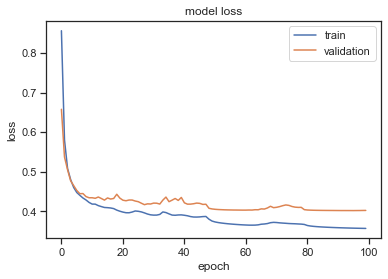

In [52]:
#Visualizing the Loss over epochs
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [53]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

In [54]:
# save model and architecture to single file

autoencoder.save("./Early_Integration_AE_PanCan_GE_MultiBlock_Meth_v1.h5")
print("Saved model to disk")

# from keras.models import model_from_json
# ## Saving and Loading the Model
# # serialize model to JSON
# model_json = Model.to_json()
# with open("pancan_meth_chr_blocks_ae_model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# Model.save_weights("pancan_meth_chr_blocks_ae_model.h5")
# print("Saved model to disk")
 
# # later...
 
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")

Saved model to disk


In [55]:
tf.keras.backend.clear_session()

In [59]:
with tf.device('/gpu:1'): #Ensuring the fitting is happening in the same GPU as training
    #Obtain the reduced data
    # temp_model = keras.models.load_model("Early_Integration_AE_PanCan_GE_MultiBlock_Meth_v1.h5")
    encoder = Model(inputs = [input_dim_list,input_ge], outputs = encoded3) ##ToDo: Vv sketchy
    # encoded_input = Input(shape = (encoding_dim, ))

    encoded_train = pd.DataFrame(encoder.predict([subset_meth_df_list,subset_ge_df]), index=subset_meth_df_list[0].index) #Maintain Index for Mapping to cancer type 
    encoded_train = encoded_train.add_prefix('feature_')
    encoded_train.shape

In [72]:
#output dataset
shape_before_removing_nan = encoded_train.shape
encoded_train.replace(0, np.nan, inplace=True) #Converting all the zero's to nan to use nan command
encoded_train.dropna(how='all',axis=1, inplace=True) #Removing columns with all nan rows
encoded_train.dropna(how='all',axis=0, inplace=True) #Removing rows with all nan columns
encoded_train.replace(np.nan, 0, inplace=True) #Converting all the nan's to zero to be compatible with t-SNE
print(shape_before_removing_nan, encoded_train.shape)

encoded_train.to_csv("LatentFeatures_31_EarlyIntergration_GE_Meth_top50%MAD_AE.csv", index=True)
# encoded_train = pd.read_csv("Meth_AE_v2.csv",index_col=[0,1,2,3,4])

(9081, 31) (9081, 31)


In [63]:
encoded_train

,feature_2,feature_14,feature_15,feature_17,feature_18,feature_19,feature_21,feature_23,feature_24,feature_26,...,feature_67,feature_74,feature_79,feature_80,feature_81,feature_85,feature_86,feature_87,feature_89,feature_96
TCGA-05-4384-01A,4.606601,1.665028,2.653676,8.002339,6.193596,3.782452,10.993107,0.194403,0.000000,0.0,...,5.003795,3.359909,3.941825,3.119412,7.907004,0.000000,2.259692,1.007309,5.773787,4.346034
TCGA-05-4390-01A,0.000000,9.095110,0.851722,13.136343,9.694225,6.167028,12.453331,7.986786,0.000000,0.0,...,9.218498,4.124309,7.133117,2.657474,5.639949,3.880394,2.504975,5.259673,2.901409,2.891872
TCGA-05-4396-01A,3.562392,0.410759,6.888668,7.331501,11.669844,4.313550,12.191271,4.425364,0.000000,0.0,...,7.086100,0.192034,0.000000,1.770551,3.173966,0.000000,7.426671,6.160862,7.597874,5.607186
TCGA-05-4405-01A,0.000000,4.967076,0.000000,6.488183,7.114535,5.381505,11.230453,4.392030,1.737723,0.0,...,3.421021,0.000000,1.752693,5.817635,3.236258,0.854842,7.225718,0.000000,6.898060,0.000000
TCGA-05-4410-01A,0.627273,3.649785,0.000000,7.222570,10.812422,8.764115,10.912661,0.534769,4.969285,0.0,...,3.507849,0.767330,1.427068,3.124166,4.594462,2.620059,4.304419,1.636794,6.323350,0.255867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-ZS-A9CG-01A,9.975141,0.000000,0.000000,0.748032,1.581336,9.107833,0.000000,1.465448,0.000000,0.0,...,13.574822,0.000000,2.664399,5.575172,3.814757,0.000000,6.494125,3.579358,1.705501,8.098472
TCGA-ZT-A8OM-01A,0.000000,3.281785,3.941663,3.808095,7.404198,10.007074,0.000000,5.401299,0.730311,0.0,...,0.000000,0.000000,5.740933,13.718254,12.437786,11.548355,9.818076,0.000000,0.690022,0.000000
TCGA-ZU-A8S4-01A,4.244334,3.671334,8.528425,0.000000,8.930982,8.182313,5.215482,0.000000,0.000000,0.0,...,5.611438,0.000000,2.439148,4.206384,7.720354,3.617820,6.319076,6.267227,3.690438,8.067832
TCGA-ZU-A8S4-11A,7.956450,0.000000,0.000000,0.000000,1.406355,8.043962,0.000000,1.568436,0.000000,0.0,...,11.532238,0.000000,2.442906,2.460092,7.489976,2.195329,12.577626,9.652660,0.000000,3.044470


In [ ]:
# encoded_train.to_csv("Meth_AE_v2.csv", index=True)
# encoded_train = pd.read_csv("Meth_AE_v2.csv",index_col=[0,1,2,3,4])

In [64]:
#Scaling these features to -1,1 range for applying tsne
from sklearn.preprocessing import MinMaxScaler
feature_list = encoded_train.columns.tolist()
scaler = MinMaxScaler(feature_range=(0,1))
encoded_train[feature_list] = scaler.fit_transform(encoded_train[feature_list])

In [65]:
encoded_train.head()

,feature_2,feature_14,feature_15,feature_17,feature_18,feature_19,feature_21,feature_23,feature_24,feature_26,...,feature_67,feature_74,feature_79,feature_80,feature_81,feature_85,feature_86,feature_87,feature_89,feature_96
TCGA-05-4384-01A,0.193489,0.074133,0.106409,0.263110,0.294368,0.169513,0.526049,0.008356,0.00000,0.0,...,0.214612,0.140557,0.159420,0.098663,0.430388,0.000000,0.069058,0.033339,0.259683,0.189134
TCGA-05-4390-01A,0.000000,0.404945,0.034153,0.431911,0.460745,0.276379,0.595925,0.343296,0.00000,0.0,...,0.395380,0.172534,0.288486,0.084052,0.306990,0.185280,0.076554,0.174078,0.130494,0.125851
TCGA-05-4396-01A,0.149630,0.018288,0.276226,0.241053,0.554642,0.193314,0.583385,0.190215,0.00000,0.0,...,0.303922,0.008033,0.000000,0.056000,0.172763,0.000000,0.226964,0.203904,0.341723,0.244018
TCGA-05-4405-01A,0.000000,0.221151,0.000000,0.213326,0.338138,0.241175,0.537407,0.188783,0.08138,0.0,...,0.146727,0.000000,0.070885,0.184003,0.176154,0.040817,0.220823,0.000000,0.310248,0.000000
TCGA-05-4410-01A,0.026347,0.162501,0.000000,0.237472,0.513891,0.392768,0.522200,0.022986,0.23272,0.0,...,0.150451,0.032100,0.057715,0.098813,0.250082,0.125102,0.131546,0.054172,0.284400,0.011135


### 6. Dimension Reduction and Cluster Visualization using t-SNE 


perplexity parameter can be changed based on the input datatset - dataset with larger number of variables requires larger perplexity set this value between 5 and 50 (sklearn documentation) verbose=1 displays run time messages set n_iter sufficiently high to resolve the well stabilized cluster get embeddings


In [66]:
# Perform t-SNE on AE encoded_features
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0, perplexity=40, learning_rate=300, n_iter=400, verbose=1)
tsne_out = tsne.fit_transform(encoded_train)
# tsne_out = TSNE(n_components=2, perplexity=105, n_iter=1000, verbose=1).fit_transform(encoded_train)
tsne_components = pd.DataFrame(tsne_out, index =encoded_train.index ) #Maintain Index


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9081 samples in 0.000s...
[t-SNE] Computed neighbors for 9081 samples in 1.956s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9081
[t-SNE] Computed conditional probabilities for sample 2000 / 9081
[t-SNE] Computed conditional probabilities for sample 3000 / 9081
[t-SNE] Computed conditional probabilities for sample 4000 / 9081
[t-SNE] Computed conditional probabilities for sample 5000 / 9081
[t-SNE] Computed conditional probabilities for sample 6000 / 9081
[t-SNE] Computed conditional probabilities for sample 7000 / 9081
[t-SNE] Computed conditional probabilities for sample 8000 / 9081
[t-SNE] Computed conditional probabilities for sample 9000 / 9081
[t-SNE] Computed conditional probabilities for sample 9081 / 9081
[t-SNE] Mean sigma: 0.208149


C:\Users\ssrikrishnan6\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.434418
[t-SNE] KL divergence after 400 iterations: 1.524473


In [67]:
tsne_components = pd.DataFrame(tsne_out, index =encoded_train.index ) #Maintain Index
tsne_components.head()

,0,1
TCGA-05-4384-01A,0.910639,-10.543128
TCGA-05-4390-01A,0.065446,-7.753771
TCGA-05-4396-01A,-1.344226,-12.498672
TCGA-05-4405-01A,2.075757,-10.641851
TCGA-05-4410-01A,2.723879,-8.320286


### 7. Mapping samples to cancer type


In [68]:
import pandas as pd
patient_metadata = pd.read_csv(r"C:\Users\ssrikrishnan6\ae_integration\info_all_ex.txt", sep = "\t")
patient_metadata = patient_metadata[[ 'cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id','cases.0.project.project_id','cases.0.samples.0.sample_type']] #tolist()
patient_metadata.rename(columns={'cases.0.project.project_id': "cancer_type", "cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id":"tcga_id"},inplace=True)
patient_metadata.set_index("tcga_id", inplace=True)

new_patient_indices = []
for index in patient_metadata.index:
    new_patient_indices.append("-".join(index.split("-")[:-3]))
patient_metadata.index = new_patient_indices

In [69]:
patient_metadata.index 

Index(['TCGA-NC-A5HI-01A', 'TCGA-68-8251-01A', 'TCGA-98-A53A-01A',
       'TCGA-39-5029-01A', 'TCGA-22-5474-01A', 'TCGA-CN-5355-01A',
       'TCGA-CV-7235-01A', 'TCGA-CV-5440-01A', 'TCGA-MT-A51X-01A',
       'TCGA-CQ-5331-01A',
       ...
       'TCGA-CH-5740-01A', 'TCGA-J4-A67M-01A', 'TCGA-M7-A723-01A',
       'TCGA-HC-7075-01A', 'TCGA-CH-5741-01A', 'TCGA-YL-A9WL-01A',
       'TCGA-KK-A5A1-01A', 'TCGA-HU-A4H6-01A', 'TCGA-BR-8291-01A',
       'TCGA-BR-4253-01A'],
      dtype='object', length=11093)

In [70]:
# new_indices = []
# for index in tsne_components.index:
#     new_index = index[1]
#     new_indices.append(new_index)
# tsne_components.index = new_indices

# new_tsne_components = tsne_components.copy()
# new_tsne_components.index = new_indices

# #Merging based on tcga_id
grouped_tsne = pd.merge(tsne_components , patient_metadata['cancer_type'] , left_index=True, right_index=True)

print(grouped_tsne.shape)
grouped_tsne.head()

(9111, 3)


,0,1,cancer_type
TCGA-05-4384-01A,0.910639,-10.543128,TCGA-LUAD
TCGA-05-4390-01A,0.065446,-7.753771,TCGA-LUAD
TCGA-05-4396-01A,-1.344226,-12.498672,TCGA-LUAD
TCGA-05-4405-01A,2.075757,-10.641851,TCGA-LUAD
TCGA-05-4410-01A,2.723879,-8.320286,TCGA-LUAD


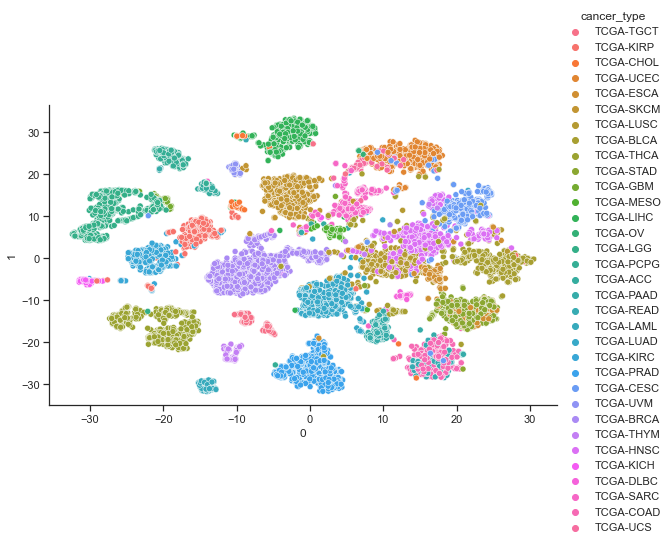

In [71]:
# CURRENT
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

cancer_types = grouped_tsne['cancer_type'].tolist()
cancer_types = list(set(cancer_types))

seaborn.relplot(data=grouped_tsne, x=0, y=1, hue='cancer_type', hue_order=cancer_types, aspect=1.61)
plt.show()

Relplot = A figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions: scatterplot() (with kind="scatter" ; the default)

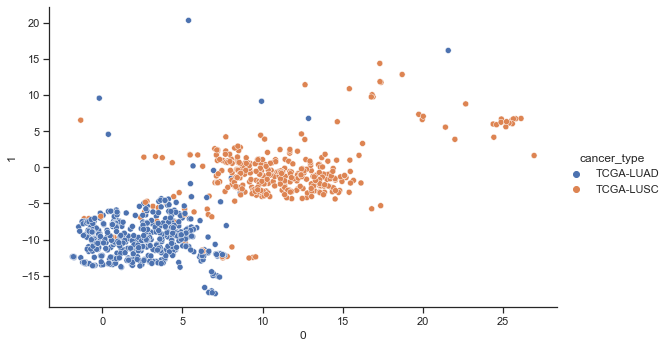

In [73]:
lung_cancer_types = ["TCGA-LUAD","TCGA-LUSC"] 
lung_cancer_df = grouped_tsne[grouped_tsne['cancer_type'].isin(lung_cancer_types)]

seaborn.relplot(data=lung_cancer_df, x=0, y=1, hue='cancer_type', hue_order=lung_cancer_types, aspect=1.61)
plt.show()

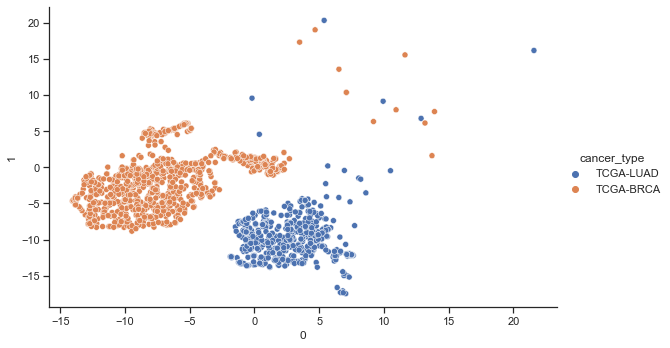

In [74]:
lung_breast_cancer_types = ["TCGA-LUAD","TCGA-BRCA"] 
lung_breast_cancer_df = grouped_tsne[grouped_tsne['cancer_type'].isin(lung_breast_cancer_types)]

seaborn.relplot(data=lung_breast_cancer_df, x=0, y=1, hue='cancer_type', hue_order=lung_breast_cancer_types, aspect=1.61)
plt.show()